# Simple logistic regression

## Import all libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the dataset

In [ ]:
df = pd.read_csv('Height-Weight.csv')                  #### Read
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


## First 10 rows

In [4]:
df.head(15)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

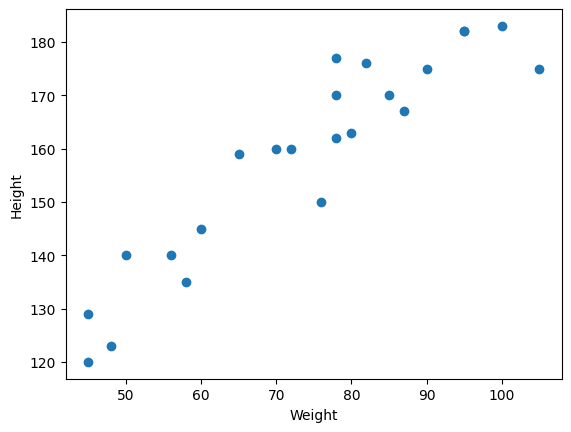

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
X = df[['Weight']]
Y = df['Height']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [41]:
X.shape

(23, 1)

In [42]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [43]:
## Standardize the dataset Train independent

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

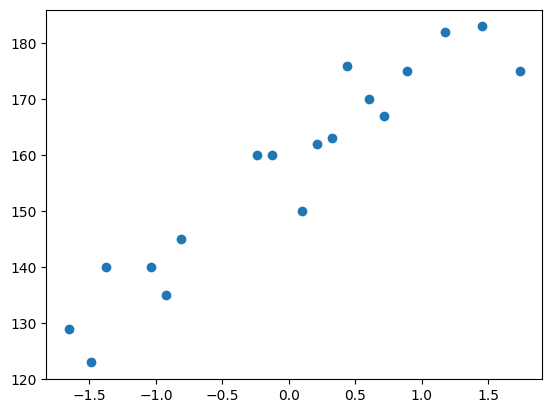

In [49]:
plt.scatter(X_train,Y_train)

## Trin the simple regression model

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
regressor = LinearRegression()

In [53]:
regressor.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
print('The slope or coefficient of weight is',regressor.coef_)
print('intercept:',regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
intercept: 157.5


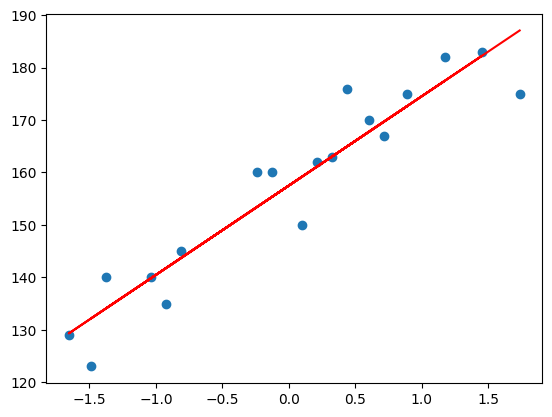

In [64]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')


### Prediction of train data 
#### 1) predicted height output = intercept+coef_(Weights)
#### 2) y_pred_train=65.4364+1.26(X_train)


### Prediction of test data 
#### 1) predicted height output = intercept+coef_(Weights)
#### 2) y_pred_test=65.43641+1.26(X_test)

In [69]:
Y_pred_test=regressor.predict(X_test)
Y_pred_test,Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

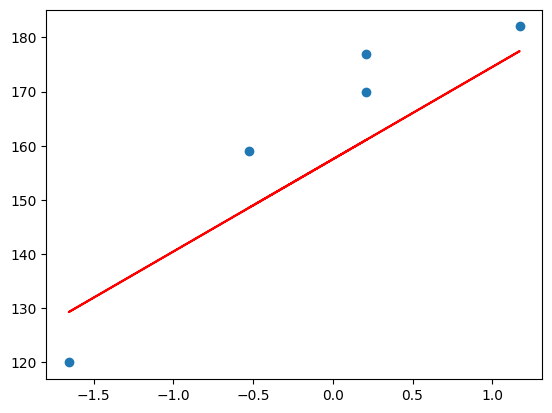

In [73]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [77]:

 from sklearn.metrics import mean_squared_error, mean_absolute_error

In [85]:
mse=mean_squared_error(Y_test,Y_pred_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
### formula
#### R^2 = 1-SSR/SST
#### R^2 = coefficient of deermination SSR = sum of squares of residuals SST = total sum of squares

In [88]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred_test)

In [89]:
score

0.776986986042344

** Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)] ***
where 
R2: The R2 of the model

n: The No of observations

k:The no of predictor variables


In [95]:
# Display adjusted R-squared

In [98]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

In [99]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [104]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

In [105]:
print('the height of prediction for weight 80kg :',regressor.predict([scaled_weight[0]]))

the height of prediction for weight 80kg : [163.01076266]


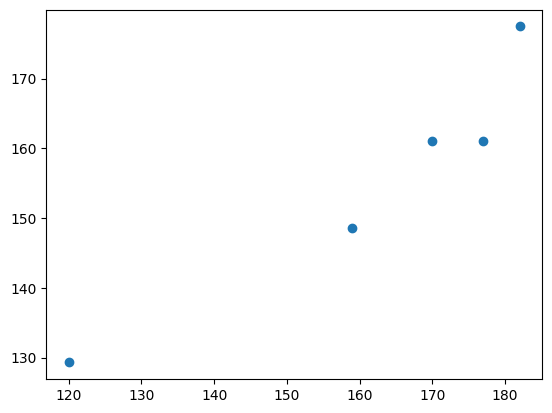

In [106]:
plt.scatter(Y_test,Y_pred_test)

In [107]:
## Residuals
residuals = Y_test-Y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

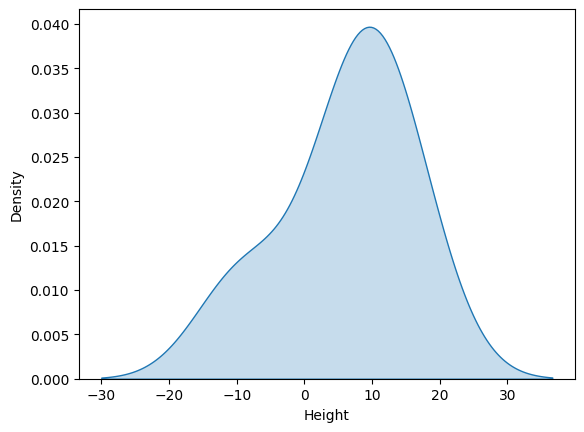

In [115]:
import seaborn as sns
sns.kdeplot(residuals, fill=True)
plt.show()

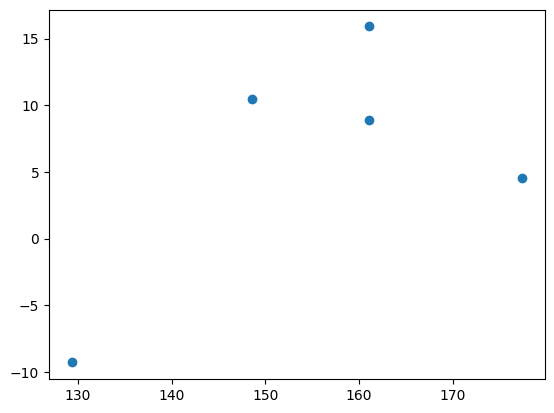

In [116]:
plt.scatter(Y_pred_test,residuals)